## Numerical Simulation Laboratory (NSL)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


### Exercise 1

The goal of lesson 12 is to use deep neural network models to recognize and distinguish between the handwritten digits of the MNIST dataset.

By keeping fixed all the other parameters, I trained my NN using SGD, Adam and RMSprop optimizers watching to accuracy and loss for training and validation data.

In [2]:
# Step 1: Load and Process the Data

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [4]:
# Step 2: Define the Neural Net and its Architecture
    
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

# Step 3: Choose the Optimizer and the Cost Function

def compile_model(optim):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optim,
                  metrics=['accuracy'])
    return model

Optimizer:  sgd
Test loss: 0.1589429710969329
Test accuracy: 0.9520999789237976


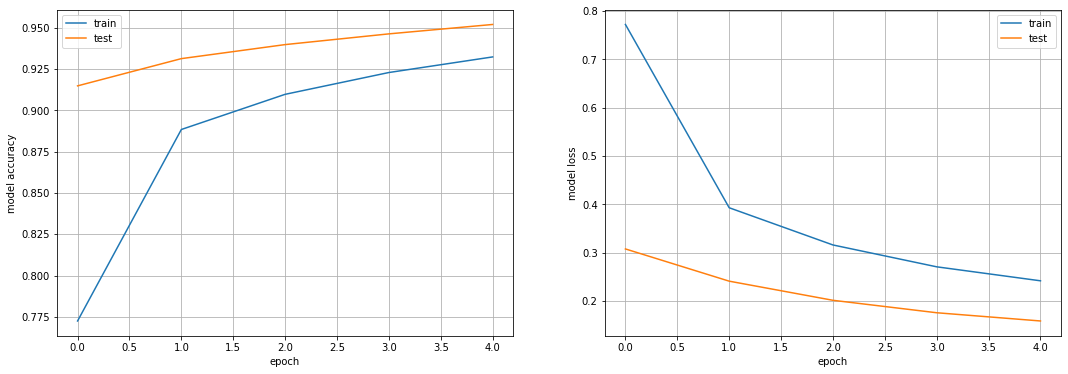

Optimizer:  Adam
Test loss: 0.07615995969413798
Test accuracy: 0.980400025844574


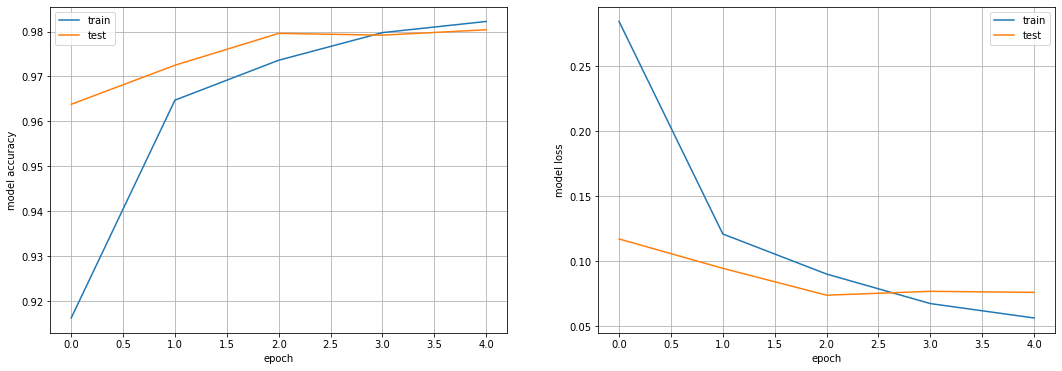

Optimizer:  RMSprop
Test loss: 0.14522779358799254
Test accuracy: 0.973800003528595


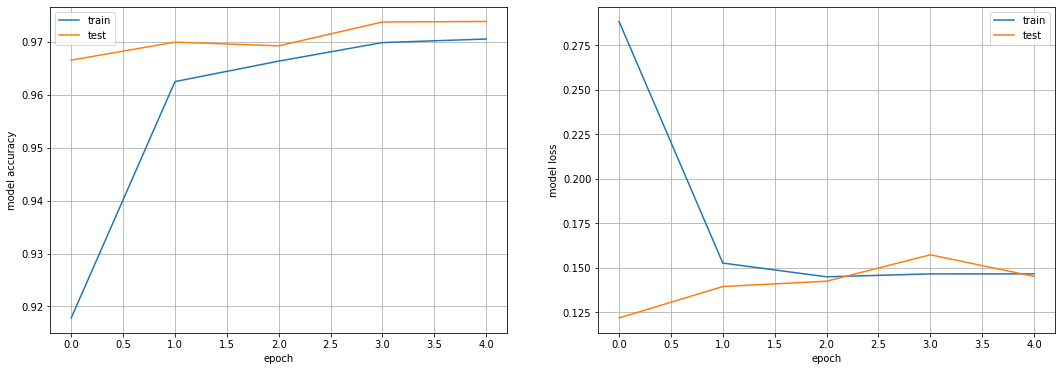

In [10]:
# Step 4: Train the model

# training parameters
batch_size = 32
epochs = 5
optims = ["sgd","Adam","RMSprop"]

index = 1

for optim in optims:
    
    # create the deep neural net
    model_DNN = compile_model(optim)

    # train DNN and store training info in history
    history = model_DNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(X_test, Y_test))
    
    # Step 5: Evaluate the Model Performance on the Unseen Test Data

    # evaluate model
    score = model_DNN.evaluate(X_test, Y_test, verbose=0)

    # print performance
    print('Optimizer: ', optim)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    plt.figure(index, figsize = (18, 6))

    # look into training history

    # summarize history for accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('model accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.grid(True)

    # summarize history for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('model loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.grid(True)
    
    plt.show()
    
    index=index+1

The network that exploits Adam optimizer is the one that obtains best results, even if in the second part of the training the test accuracy tends to stationate. This is clearly visible in the loss plot, in which we see the train curve keeping decrease and the test curve settle, sign that probably increasing training time we would incur in overfitting.
Sgd curve are the most regular and probably increasing training time would lead to better results.
The graph of RMSprop shows a moment when test accuracy starts to decrease then increase again. This is evident in loss plot, in which test loss reaches a maximum and then starts to descend again.
Also in this case we would likely improve the result increasing training time.
In all three cases we are able to reach accuracy values higher than $97\%$.

### Exercise 2

I than changed the architecture of my DNN using convolutional layers to consider also local spatial correlations between the pixels, hoping to improve the accuracy of the classification of the model.

I used `Conv2D`, `MaxPooling2D`, `Dropout`, and also `Flatten`, `Dense` and `soft-max` layers to build such convolutional DNN.

In [15]:
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [16]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
                               
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(5, kernel_size=(5, 5), activation='relu'))
    
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Flatten())
    
    model.add(Dense(120, activation='relu'))
    
    model.add(Dense(10, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model

In [17]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 23s 386us/step - loss: 0.5874 - accuracy: 0.8156 - val_loss: 0.1777 - val_accuracy: 0.9467
Epoch 2/5
60000/60000 [==============================] - 21s 353us/step - loss: 0.1612 - accuracy: 0.9515 - val_loss: 0.1125 - val_accuracy: 0.9643
Epoch 3/5
60000/60000 [==============================] - 21s 352us/step - loss: 0.1200 - accuracy: 0.9643 - val_loss: 0.0944 - val_accuracy: 0.9705
Epoch 4/5
60000/60000 [==============================] - 22s 359us/step - loss: 0.0994 - accuracy: 0.9700 - val_loss: 0.0834 - val_accuracy: 0.9731
Epoch 5/5
10000/10000 [==============================] - 1s 94us/step

Test loss: 0.08478215199429542
Test accuracy: 0.9735000133514404


In the end I evaluated performances of my CNN.

10000/10000 [==============================] - 1s 101us/step

Test loss: 0.08478215199429542
Test accuracy: 0.9735000133514404


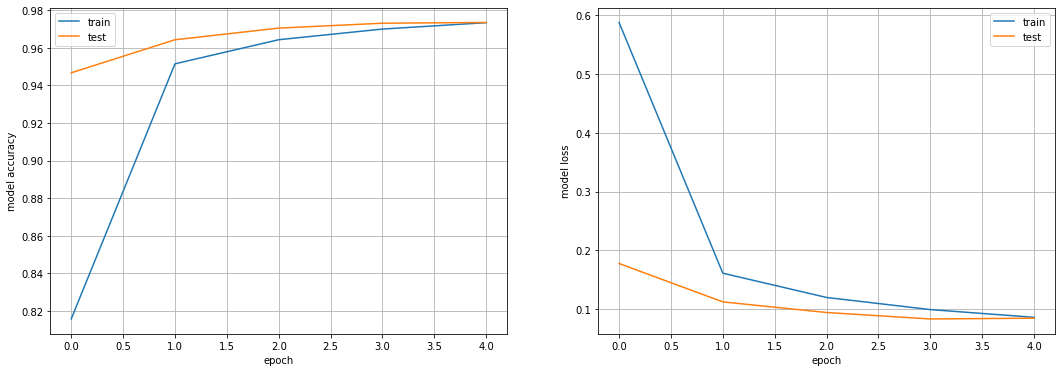

In [18]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(index, figsize = (18, 6))

# summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

### Exercise 3

Finally I used the `gimp` application to create 10 pictures of digits "handwritten" by me and imported them with the provided code in order to see if my CNN is able to recognize them.

Errors:  2


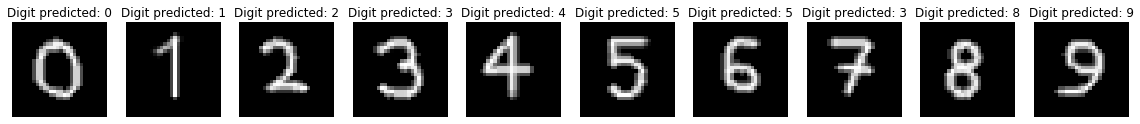

In [21]:
from PIL import Image
import os

err=0

plt.figure(figsize=(10*2,2))

for digit in range(10):
    digit_filename = "./digits/"+str(digit)+".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    
    plt.subplot(1, 10, digit+1)
    
    plt.imshow(data, cmap='gray')
    
    data = data.reshape(1,xdim*ydim)

    if keras.backend.image_data_format() == 'channels_first':
        data = data.reshape(data.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        data = data.reshape(data.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
        
    pred_0 = model_CNN.predict(data)
    
    if np.argmax(pred_0) != digit:
        err=err+1
       
    plt.title("Digit predicted: {}".format(np.argmax(pred_0)))
    plt.axis('off')
    
print("Errors: ", err)